## Proyek Analisis Data: Bike Sharing Dataset
- Nama : I Gede Widnyana
- Username : igedewidnyana
- Email : widnyana.2208561016@student.unud.ac.id

- Overview Project dan Dataset : Dataset Bike Sharing adalah kumpulan data yang merekam aktivitas peminjaman sepeda dari sistem bike sharing yang otomatis. Data ini mencakup berbagai informasi seperti tanggal, musim, hari kerja, kondisi cuaca, suhu, kelembaban, kecepatan angin, serta jumlah pengguna sepeda yang terbagi antara pengguna kasual dan terdaftar. Informasi perjalanan yang terekam secara lengkap, mulai dari durasi hingga lokasi keberangkatan dan kedatangan, menjadikan dataset ini kaya akan informasi mengenai pola mobilitas perkotaan. Tujuan dari proyek analisis data ini adalah untuk memahami tren penggunaan sepeda di kota berdasarkan faktor-faktor eksternal seperti cuaca, hari kerja, atau hari libur, serta untuk memprediksi jumlah peminjaman sepeda di masa mendatang. Selain itu, proyek ini juga bertujuan untuk membantu perencanaan transportasi, mengoptimalkan pengelolaan sistem bike sharing, dan mendukung pengambilan keputusan terkait masalah lalu lintas, lingkungan, dan kesehatan masyarakat.









### Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Membaca dan menampilkan 5 baris data teratas dari dataset day.csv

In [3]:
df_day = pd.read_csv("dataset/day.csv")
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Gathering Data

- Membaca dan menampilkan 5 baris data teratas dari dataset hour.csv

In [4]:
df_jam = pd.read_csv("dataset/hour.csv")
df_jam.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
- Meninjau dan mengecek tipe data dari dataset 'df_day'

In [5]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Hasil Pengecekan 'df_day'** : 
Dataset ini memiliki 731 baris data yang lengkap tanpa adanya missing value. Namun, terdapat kesalahan tipe data pada kolom "dteday" yang seharusnya direpresentasikan sebagai tipe data datetime, bukan object.

- Mengecek data yang duplikat (ganda) dan rangkuman parameter statistik data dari dataset 'df_day'

In [6]:
print("Jumlah data yang duplikat adalah ", df_day.duplicated().sum())
df_day.describe()

Jumlah data yang duplikat adalah  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight**: Dataset ini terdiri dari 731 baris data tanpa adanya data duplikat, menunjukkan kualitas data yang baik untuk analisis lebih lanjut. Rata-rata peminjaman sepeda per hari (variabel "cnt") adalah sekitar 4504 kali, dengan jumlah minimum peminjaman sebanyak 22 kali dan maksimum mencapai 8714 kali. Hal ini menunjukkan variasi yang cukup besar dalam penggunaan sepeda harian. Pengguna terdaftar ("registered") memiliki rata-rata peminjaman lebih tinggi (sekitar 3656) dibandingkan dengan pengguna kasual ("casual") yang rata-ratanya hanya sekitar 848, mengindikasikan bahwa sistem bike sharing lebih banyak dimanfaatkan oleh pengguna yang sudah terdaftar.

Variabel cuaca seperti "temp" (suhu) dan "hum" (kelembaban) menunjukkan nilai rata-rata masing-masing sebesar 0.495 dan 0.627, yang mengindikasikan penggunaan sepeda terjadi pada kondisi cuaca yang beragam. Faktor lain seperti "holiday" dan "workingday" juga dapat dianalisis lebih lanjut untuk memahami pola peminjaman sepeda antara hari kerja dan hari libur. Secara keseluruhan, dataset ini memiliki variasi yang cukup baik dan dapat digunakan untuk mengeksplorasi berbagai faktor yang mempengaruhi penggunaan sistem bike sharing.

### Assessing Data
- Meninjau dan mengecek tipe data dari dataset 'df_jam'

In [7]:
df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight**:

Dataset ini terdiri dari 17.379 baris dan 17 kolom, menunjukkan bahwa data peminjaman sepeda dalam skala waktu yang lebih rinci (kemungkinan per jam). Semua kolom memiliki nilai lengkap (non-null), menandakan tidak adanya data yang hilang. Sebagian besar kolom memiliki tipe data int64 (12 kolom), yang mencakup variabel seperti "instant," "season," "yr," "mnth," "hr," serta jumlah pengguna sepeda ("casual," "registered," dan "cnt"). Ada 4 kolom dengan tipe float64 yang mencerminkan variabel lingkungan seperti suhu ("temp," "atemp"), kelembaban ("hum"), dan kecepatan angin ("windspeed"). Kolom "dteday" berjenis object, dan sebaiknya diubah menjadi tipe datetime untuk memudahkan analisis waktu.

- Mengecek data yang duplikat (ganda) dan rangkuman parameter statistik data dari dataset 'df_jam'

In [8]:
print("Jumlah data yang duplikat adalah ", df_jam.duplicated().sum())
df_jam.describe()

Jumlah data yang duplikat adalah  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight**:

Dataset "df_jam" terdiri dari 17.379 entri tanpa data duplikat, dan mencakup informasi peminjaman sepeda per jam. Rata-rata total peminjaman sepeda per jam ("cnt") adalah sekitar 189, dengan jumlah minimum 1 dan maksimum 977, menunjukkan variasi penggunaan yang cukup besar sepanjang waktu. Pengguna terdaftar ("registered") cenderung mendominasi peminjaman dengan rata-rata sekitar 153, dibandingkan dengan pengguna kasual ("casual") yang rata-ratanya hanya sekitar 36. Kondisi cuaca ("weathersit") dan suhu ("temp") juga bervariasi, dengan nilai suhu rata-rata 0,497 (dalam bentuk normalisasi). Variabel lainnya seperti "holiday" dan "workingday" mengindikasikan bahwa peminjaman terjadi pada berbagai jenis hari, memberikan peluang untuk analisis tren berdasarkan faktor waktu dan cuaca.

### Cleaning Data
**Membersihkan Data 'df_day'**
 - Mengubah Tipe Data pada kolom dteday jadi datetime

In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_day[column] = pd.to_datetime(df_day[column])

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Hasil** :

Terlihat bahwa tipe data pada column dteday sudah berubah menjadi datetime

- Mengubah penamaan kolom pada dataset 'df_day' supaya mudah dimengerti

In [10]:
# Mengubah Judul Kolom
df_day.rename(columns={
    "instant": "index",
    "dteday": "date",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

# Mengubah isi kolom yang berupa angka menjadi keterangan
month_mapping = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Sep", 12: "Dec"}
df_day["month"] = df_day["month"].map(month_mapping)

weather_mapping = {1: "Clear/Few Clouds", 2: "Misty/Cloudy",
                   3: "Light Snow/Light Rain", 4: "Heavy Rain/Ice Pallets"}
df_day["weather"] = df_day["weather"].map(weather_mapping)

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_day["season"] = df_day["season"].map(season_mapping)

weekday_mapping = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
df_day["weekday"] = df_day["weekday"].map(weekday_mapping)

workingday_mapping = {0: "holiday", 1: "weekday"}
df_day["workingday"] = df_day["workingday"].map(workingday_mapping)

year_mapping = {0: "2011", 1: "2012"}
df_day["year"] = df_day["year"].map(year_mapping)

df_day.head()

,index,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,0,Sat,holiday,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,Sun,holiday,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,Mon,weekday,Clear/Few Clouds,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,Tue,weekday,Clear/Few Clouds,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,Wed,weekday,Clear/Few Clouds,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Cleaning Data
**Membersihkan Data 'df_jam'**
 - Mengubah Tipe Data pada kolom dteday jadi datetime

In [11]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_jam[column] = pd.to_datetime(df_jam[column])

df_jam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Hasil** : Tipe data kolom dteday pada dataset 'df_jam' yang awalnya object sudah berubah menjadi datetime

- Mengubah penamaan kolom pada dataset 'df_jam' supaya mudah dimengerti

In [12]:
# Mengubah Judul Kolom
df_jam.rename(columns={
    "instant": "index",
    "dteday": "date",
    "hr": "hour",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather",
    "cnt": "count"
}, inplace=True)

# Mengubah isi kolom yang berupa angka menjadi keterangan
month_mapping = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
                 7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Sep", 12: "Dec"}
df_jam["month"] = df_jam["month"].map(month_mapping)

weather_mapping = {1: "Clear/Few Clouds", 2: "Misty/Cloudy",
                   3: "Light Snow/Light Rain", 4: "Heavy Rain/Ice Pallets"}
df_jam["weather"] = df_jam["weather"].map(weather_mapping)

season_mapping = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}
df_jam["season"] = df_jam["season"].map(season_mapping)

weekday_mapping = {0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"}
df_jam["weekday"] = df_jam["weekday"].map(weekday_mapping)

workingday_mapping = {0: "holiday", 1: "weekday"}
df_jam["workingday"] = df_jam["workingday"].map(workingday_mapping)

year_mapping = {0: "2011", 1: "2012"}
df_jam["year"] = df_jam["year"].map(year_mapping)

hour_mapping = {0: "00:00", 1: "01:00", 2: "02:00", 3: "03:00", 4: "04:00", 5: "05:00",
                6: "06:00", 7: "07:00", 8: "08:00", 9: "09:00", 10: "10:00", 11: "11:00",
                12: "12:00", 13: "13:00", 14: "14:00", 15: "15:00", 16: "16:00", 17: "17:00",
                18: "18:00", 19: "19:00", 20: "20:00", 21: "21:00", 22: "22:00", 23: "23:00"}
df_jam["hour"] = df_jam["hour"].map(hour_mapping)

df_jam.head()

,index,date,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,Spring,2011,Jan,00:00,0,Sat,holiday,Clear/Few Clouds,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,Jan,01:00,0,Sat,holiday,Clear/Few Clouds,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,Jan,02:00,0,Sat,holiday,Clear/Few Clouds,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,Jan,03:00,0,Sat,holiday,Clear/Few Clouds,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,Jan,04:00,0,Sat,holiday,Clear/Few Clouds,0.24,0.2879,0.75,0.0,0,1,1


### Exploratory Data Analysis (EDA)

**Explore Data df_jam**

In [14]:
print ("Demografi penyewa sepeda berdasarkan musim")
df_day.groupby(by="season").agg({
    "count": ["max", "min", "mean", "sum"]
})

Demografi penyewa sepeda berdasarkan musim


count                            
         max   min         mean      sum
season                                  
Fall    8714  1115  5644.303191  1061129
Spring  7836   431  2604.132597   471348
Summer  8362   795  4992.331522   918589
Winter  8555    22  4728.162921   841613

**Insight** :

Berdasarkan pivot table di atas, musim gugur/fall memiliki rata-rata dan jumlah penyewa sepeda terbanyak, sedangkan musim semi/spring memiliki rata-rata dan jumlah penyewa sepeda paling sedikit

In [16]:
print ("Demografi penyewa sepeda berdasarkan cuaca")
df_day.groupby(by="weather").agg({
    "count": ["max", "min", "mean", "sum"]
})

Demografi penyewa sepeda berdasarkan cuaca


count                           
                        max  min         mean      sum
weather                                               
Clear/Few Clouds       8714  431  4876.786177  2257952
Light Snow/Light Rain  4639   22  1803.285714    37869
Misty/Cloudy           8362  605  4035.862348   996858

**Insight** :

Berdasarkan pivot table diatas, dapat diketahui bahwa cuaca cerah/sedikit berawan memiliki rata-rata dan jumlah penyewa sepeda terbanyak, sedangkan pada cuaca salju/hujan rata-rata dan jumlah penyewa sepeda cenderung sedikit.

In [17]:
print ("Demografi penyewa sepeda berdasarkan hari libur dan hari kerja")
df_day.groupby(by="workingday").agg({
    "count": ["max", "min", "mean", "sum"]
})

Demografi penyewa sepeda berdasarkan hari libur dan hari kerja


count                           
             max  min         mean      sum
workingday                                 
holiday     8714  605  4330.168831  1000269
weekday     8362   22  4584.820000  2292410

**Insight** :

Berdasarkan pivot table diatas, dapat diketahui bahwa pada hari libur rata-rata dan jumlah penyewa sepeda cenderung sedikit dibandingkan dengan hari-hari biasa

In [19]:
print ("Mengelompokkan temp, hum, dan windspeed berdasarkan season")

df_day.groupby(by="season").agg({
    "temp": ["max", "min", "mean", "sum"],
    "hum": ["max", "min", "mean", "sum"],
    "windspeed": ["max", "min", "mean", "sum"]
})

Mengelompokkan temp, hum, dan windspeed berdasarkan season


temp                                       hum            \
             max       min      mean         sum       max       min   
season                                                                 
Fall    0.861667  0.469167  0.706309  132.786150  0.939565  0.360000   
Spring  0.572500  0.059130  0.297748   53.892306  0.948261  0.000000   
Summer  0.808333  0.253043  0.544405  100.170549  0.922500  0.254167   
Winter  0.657500  0.220833  0.422906   75.277275  0.972500  0.333478   

                             windspeed                                 
            mean         sum       max       min      mean        sum  
season                                                                 
Fall    0.633482  119.094627  0.375617  0.064071  0.172095  32.353864  
Spring  0.582903  105.505427  0.507463  0.045408  0.214537  38.831210  
Summer  0.626948  115.358493  0.388067  0.065929  0.203507  37.445312  
Winter  0.668719  119.032013  0.422275  0.022392  0.171995  30.615035

Berdasarkan pivot table diatas, dapat dilihat bahwa:

1. Rata-rata temperatur (temp) tertinggi terjadi saat musim gugur (fall), kemudian summer, winter, dan spring.
2. Rata-rata kelembaban (hum) tertinggi terjadi saat musim dingin (winter), kemudian fall, summer, dan spring.
3. Rata-rata kecepatan angin (windspeed) tertinggi terjadi saat musim semi (spring), kemudian summer, fall, dan winter.

### Explore Data df_jam
- Demografi penyewa sepeda berdasarkan dataset 'df_jam'

In [20]:
print ("Demografi penyewa sepeda berdasarkan jam")
df_jam.groupby(by="hour").agg({
    "count": ["max", "min", "mean", "sum"]
})

Demografi penyewa sepeda berdasarkan jam


count                        
        max min        mean     sum
hour                               
00:00   283   2   53.898072   39130
01:00   168   1   33.375691   24164
02:00   132   1   22.869930   16352
03:00    79   1   11.727403    8174
04:00    28   1    6.352941    4428
05:00    66   1   19.889819   14261
06:00   213   1   76.044138   55132
07:00   596   1  212.064649  154171
08:00   839   5  359.011004  261001
09:00   426  14  219.309491  159438
10:00   539   8  173.668501  126257
11:00   663  10  208.143054  151320
12:00   776   3  253.315934  184414
13:00   760  11  253.661180  184919
14:00   750  12  240.949246  175652
15:00   750   7  251.233196  183149
16:00   783  11  311.983562  227748
17:00   976  15  461.452055  336860
18:00   977  23  425.510989  309772
19:00   743  11  311.523352  226789
20:00   567  11  226.030220  164550
21:00   584   6  172.314560  125445
22:00   502   9  131.335165   95612
23:00   256   2   87.831044   63941

**Insight** :

Insight dari Data Penyewaan Sepeda per Jam
Puncak Penyewaan pada Sore Hari:

Data menunjukkan bahwa jumlah penyewaan sepeda mencapai puncaknya pada pukul 17:00 dengan total 976 penyewaan. Puncak ini kemungkinan besar terkait dengan banyaknya orang yang menyewa sepeda setelah jam kerja, sehingga menciptakan lonjakan permintaan di waktu sore.
Waktu Terendah di Dini Hari:

Sebaliknya, waktu penyewaan paling rendah terjadi pada pukul 04:00, dengan hanya 28 penyewaan. Ini menunjukkan bahwa aktivitas bersepeda di luar ruangan sangat minim pada waktu dini hari, yang wajar karena kebanyakan orang cenderung tidur di waktu tersebut.
Perlambatan di Pagi Hari:

Setelah pukul 08:00, terdapat penurunan jumlah penyewaan dari 839 penyewaan menjadi 426 penyewaan pada pukul 09:00. Penurunan ini mungkin disebabkan oleh transisi dari jam sibuk pagi, di mana banyak orang berangkat kerja.
Aktivitas Konsisten Sepanjang Hari:

Dari pukul 09:00 hingga 16:00, meskipun ada fluktuasi, jumlah penyewaan tetap relatif tinggi, dengan kisaran antara 426 hingga 783 penyewaan. Ini menunjukkan bahwa ada permintaan yang konsisten untuk penyewaan sepeda sepanjang jam kerja, mungkin dari orang-orang yang bersepeda untuk aktivitas harian mereka.
Penurunan Malam Hari:

Setelah puncak di sore hari, jumlah penyewaan mulai menurun lagi, mencapai 502 penyewaan pada pukul 22:00 dan 256 penyewaan pada pukul 23:00. Hal ini menunjukkan bahwa penggunaan sepeda cenderung menurun saat malam tiba, mungkin karena keterbatasan aktivitas di luar ruangan pada malam hari.

**Rekomendasi untuk Penyedia Layanan Penyewaan Sepeda**

Promosi pada Jam Sibuk: Mengingat puncak penyewaan terjadi di sore hari, penyedia layanan bisa mempertimbangkan untuk memberikan promosi khusus pada jam-jam ini untuk menarik lebih banyak penyewa.

Peningkatan Armada untuk Jam Sibuk: Menyediakan lebih banyak sepeda pada waktu-waktu dengan permintaan tinggi seperti jam pagi dan sore bisa membantu mengurangi antrean dan meningkatkan kepuasan pelanggan.

Menyesuaikan Jam Operasional: Mengingat aktivitas penyewaan sangat rendah pada dini hari, mungkin perlu dipertimbangkan untuk menyesuaikan jam operasional agar lebih efisien.

### Visualization & Explanatory Analysis
- **Pertanyaan 1**

Apakah orang cenderung menyewa lebih banyak sepeda pada hari-hari yang cerah?

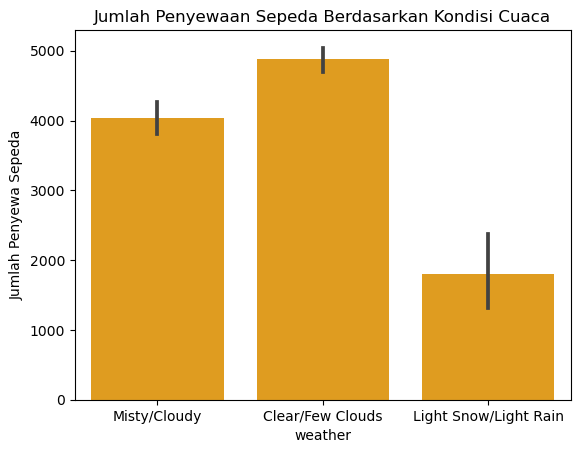

In [24]:
sns.barplot(y=df_day["count"], x=df_day["weather"], orient="v", color='orange')
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.show()

**Insight** :

Berdasarkan analisis visualisasi data yang menggunakan bar chart di atas, terlihat dengan jelas bahwa orang-orang cenderung lebih banyak menyewa sepeda ketika kondisi cuaca sedang cerah atau sedikit berawan. Bar chart menunjukkan peningkatan signifikan dalam jumlah penyewaan sepeda pada hari-hari dengan cuaca yang optimal, yang mungkin disebabkan oleh kenyamanan dan daya tarik aktivitas bersepeda di luar ruangan saat cuaca baik.

Sebaliknya, pada kondisi cuaca yang kurang mendukung, seperti saat hujan atau mendung, jumlah penyewaan sepeda menunjukkan penurunan yang cukup tajam. Hal ini menandakan bahwa masyarakat lebih memilih untuk tidak bersepeda ketika cuaca tidak bersahabat.

Insight ini memberikan pemahaman yang berharga bagi penyedia layanan penyewaan sepeda, memungkinkan mereka untuk menyesuaikan strategi pemasaran dan pengelolaan armada sesuai dengan kondisi cuaca, seperti mengadakan promosi saat cuaca cerah untuk menarik lebih banyak penyewa.

**Pertanyaan 2** 

Apakah orang cenderung menyewa lebih banyak sepeda di musim tertentu?

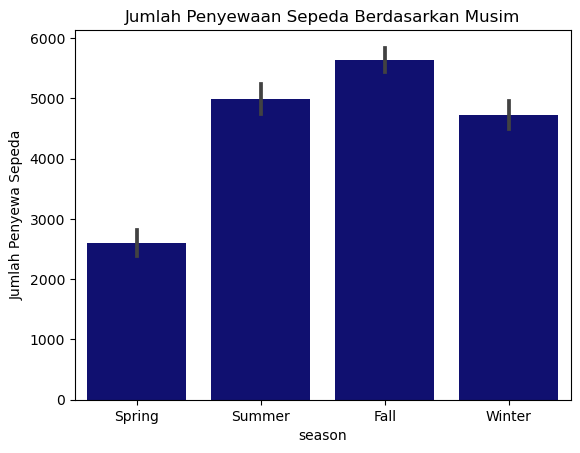

In [26]:
sns.barplot(y=df_day["count"], x=df_day["season"], orient="v", color='navy')
plt.ylabel("Jumlah Penyewa Sepeda")
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Musim")
plt.show()

**Insight** :

Berdasarkan analisis visualisasi data yang menggunakan boxplot di atas, terdapat bukti yang jelas bahwa pola penyewaan sepeda sangat dipengaruhi oleh musim. Terlihat bahwa jumlah penyewa sepeda mencapai puncaknya selama musim gugur (fall), menunjukkan bahwa orang-orang lebih cenderung menyewa sepeda pada waktu ini.

Musim gugur biasanya ditandai dengan cuaca yang sejuk dan nyaman, sehingga menciptakan kondisi ideal untuk bersepeda. Boxplot juga memperlihatkan variasi penyewaan selama musim lain, dengan penyewaan cenderung lebih rendah pada musim dingin dan musim semi. Hal ini menegaskan bahwa faktor musim berperan penting dalam memengaruhi keputusan masyarakat untuk bersepeda.

Insight ini dapat dimanfaatkan oleh penyedia layanan penyewaan sepeda untuk meningkatkan strategi pemasaran, misalnya dengan menawarkan promosi khusus atau program yang lebih menarik selama musim gugur, untuk memaksimalkan penyewaan dan menarik lebih banyak pelanggan.

***Pertanyaan 3*** 

Kapan jam paling ramai dan paling sepi dalam penyewaan sepeda?

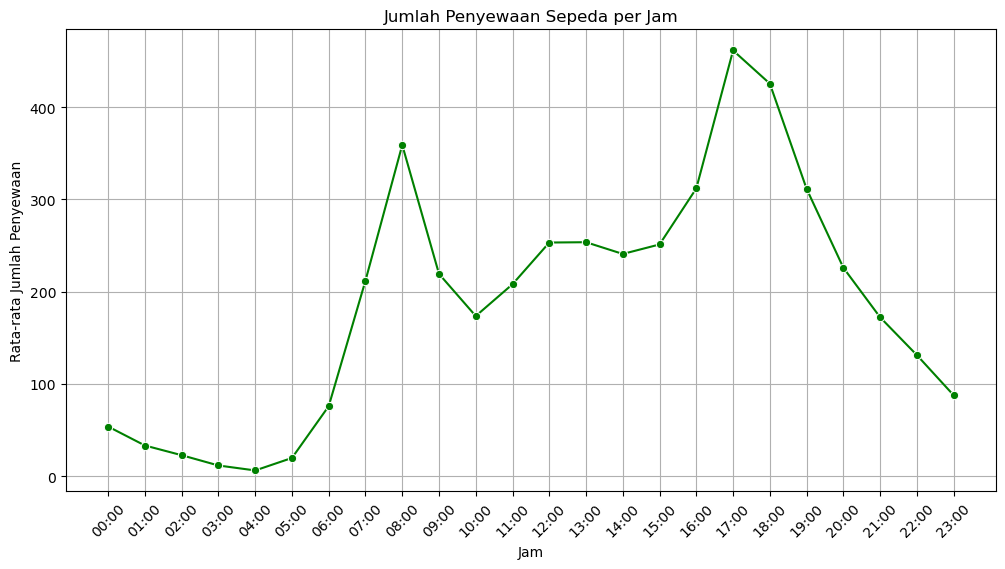

In [27]:
hourly_counts = df_jam.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=hourly_counts, marker='o', color='green')

plt.title("Jumlah Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Insight** :

Berdasarkan analisis visualisasi data yang menggunakan line plot di atas, kita dapat melihat pola yang jelas terkait dengan waktu penyewaan sepeda.

Puncak Penyewaan pada Pukul 17:00: Titik tertinggi penyewaan sepeda tercatat pada pukul 17:00. Hal ini kemungkinan besar disebabkan oleh banyaknya orang yang menyewa sepeda setelah jam kerja, saat mereka kembali ke rumah atau beraktivitas di luar ruangan setelah seharian bekerja. Puncak ini menunjukkan bahwa waktu sore adalah periode yang sangat populer untuk penyewaan sepeda.

Titik Terendah pada Pukul 04:00: Di sisi lain, jumlah penyewaan mencapai titik terendah pada pukul 04:00. Pada waktu ini, sebagian besar orang masih tidur, dan aktivitas di luar ruangan cenderung sangat rendah. Hal ini menunjukkan bahwa penyewaan sepeda pada dini hari tidak umum dilakukan.

Pola ini memberikan wawasan yang berguna bagi pengelola layanan penyewaan sepeda untuk memahami kapan waktu puncak dan sebaliknya, sehingga mereka dapat merencanakan strategi operasional, seperti penjadwalan staf dan pemeliharaan armada, agar lebih efektif sesuai dengan permintaan di berbagai waktu dalam sehari.

**Pertanyaan 4** 

Apakah faktor-faktor seperti suhu, kelembaban, dan kecepatan angin memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda?

C:\Users\Widnyana\AppData\Local\Temp\ipykernel_19856\3411756278.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_day.corr()


Korelasi fitur dengan jumlah penyewaan sepeda (count):
 count         1.000000
registered    0.945517
casual        0.672804
atemp         0.631066
index         0.628830
temp          0.627494
holiday      -0.068348
hum          -0.100659
windspeed    -0.234545
Name: count, dtype: float64


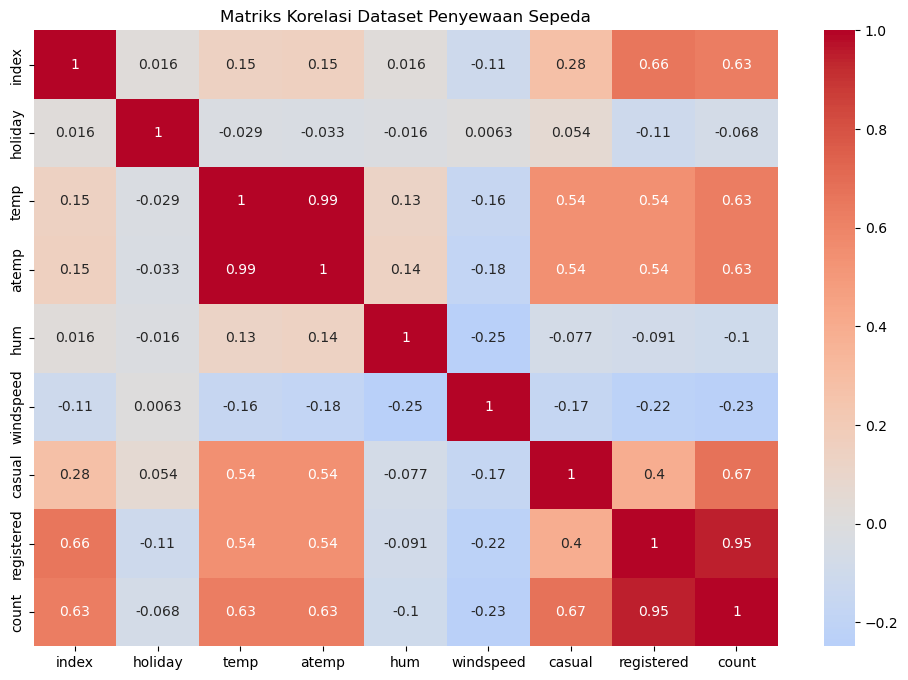

In [30]:
# Menghitung matriks korelasi dari dataset
correlation_matrix = df_day.corr()

# Menampilkan korelasi antara semua fitur dengan 'count'
corr_with_count = correlation_matrix["count"].sort_values(ascending=False)
print("Korelasi fitur dengan jumlah penyewaan sepeda (count):\n", corr_with_count)

# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Matriks Korelasi Dataset Penyewaan Sepeda")
plt.show()


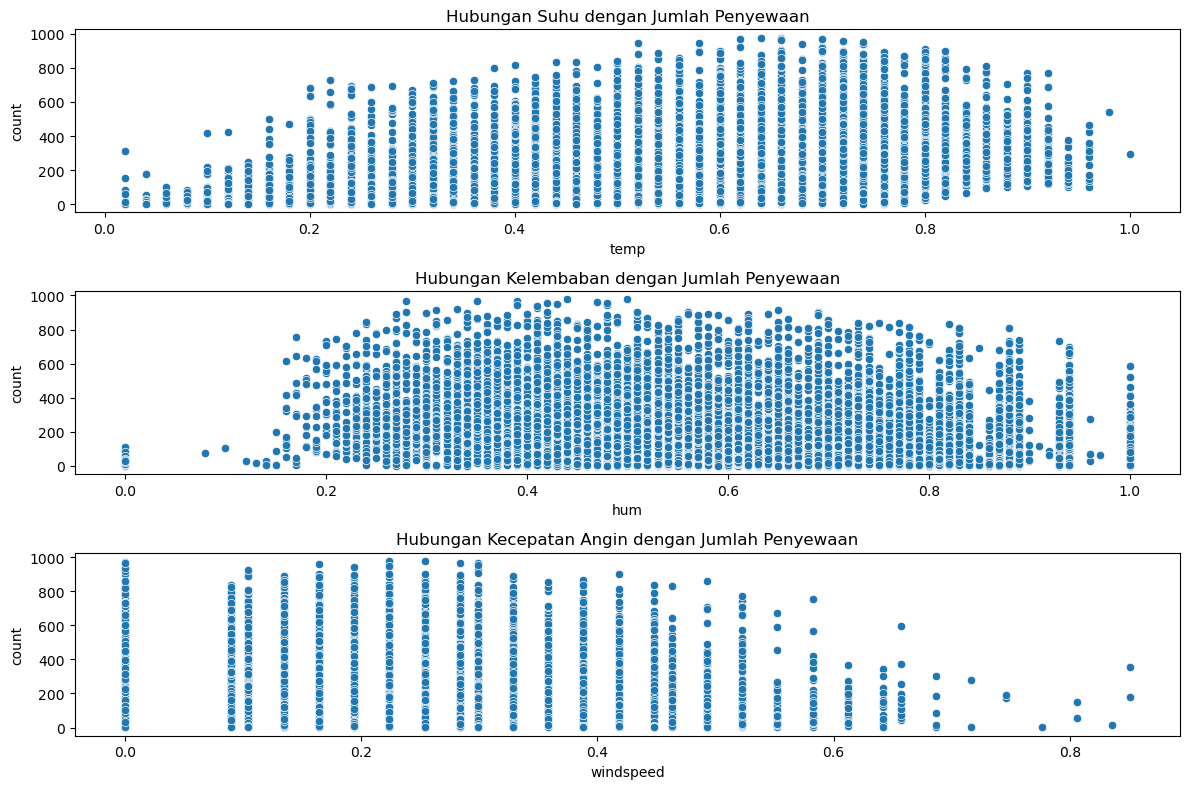

In [32]:
plt.figure(figsize=(12,8))

# Scatter plot temp vs count
plt.subplot(3, 1, 1)
sns.scatterplot(x='temp', y='count', data=df_jam)
plt.title('Hubungan Suhu dengan Jumlah Penyewaan')

# Scatter plot hum vs count
plt.subplot(3, 1, 2)
sns.scatterplot(x='hum', y='count', data=df_jam)
plt.title('Hubungan Kelembaban dengan Jumlah Penyewaan')

# Scatter plot windspeed vs count
plt.subplot(3, 1, 3)
sns.scatterplot(x='windspeed', y='count', data=df_jam)
plt.title('Hubungan Kecepatan Angin dengan Jumlah Penyewaan')

plt.tight_layout()
plt.show()

**Insight**:

Berdasarkan analisis visualisasi data yang menggunakan scatter plot di atas, kita dapat menarik beberapa kesimpulan mengenai hubungan antara variabel-variabel yang diteliti:

1. Korelasi Positif antara Suhu dan Penyewaan Sepeda: Terdapat nilai korelasi positif yang menunjukkan adanya hubungan yang signifikan antara suhu (temp) dan jumlah penyewa sepeda (count). Hal ini mengindikasikan bahwa ketika suhu meningkat, jumlah penyewaan sepeda cenderung mengalami peningkatan pula. Ini mungkin disebabkan oleh kenyamanan bersepeda di cuaca yang lebih hangat, yang mendorong lebih banyak orang untuk menggunakan sepeda.

2. Korelasi Negatif antara Kelembaban dan Penyewaan Sepeda: Nilai korelasi negatif menunjukkan adanya hubungan negatif antara kelembaban (hum) dan jumlah penyewa sepeda (count). Ketika kelembaban meningkat, jumlah penyewa sepeda cenderung menurun. Fenomena ini bisa dipahami karena kondisi kelembaban yang tinggi sering kali tidak nyaman bagi sebagian orang, sehingga mereka lebih memilih untuk tidak bersepeda.

3. Korelasi yang Mendekati Nol untuk Kecepatan Angin: Nilai korelasi yang mendekati nol menunjukkan bahwa kecepatan angin (windspeed) tidak memiliki pengaruh signifikan terhadap jumlah penyewa sepeda (count). Hal ini berarti bahwa variasi dalam kecepatan angin tidak secara langsung memengaruhi keputusan masyarakat untuk menyewa sepeda, sehingga faktor ini mungkin tidak menjadi pertimbangan utama dalam aktivitas penyewaan sepeda.

**Pertanyaan 5** 

Apakah terjadi peningkatan atau penurunan signifikan pada hari libur?

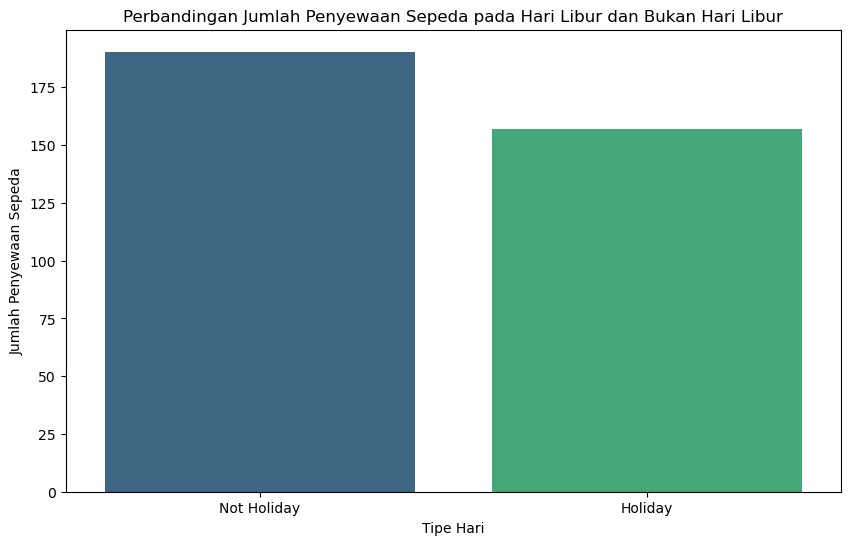

In [33]:

df_jam['holiday'] = df_jam['holiday'].map({0: 'Not Holiday', 1: 'Holiday'})

plt.figure(figsize=(10, 6))
sns.barplot(x='holiday', y='count', data=df_jam, ci=None, palette='viridis')

plt.title('Perbandingan Jumlah Penyewaan Sepeda pada Hari Libur dan Bukan Hari Libur')
plt.xlabel('Tipe Hari')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

**Insight**:

Berdasarkan analisis visualisasi data yang menggunakan bar plot di atas, terdapat pola yang jelas terkait dengan penyewaan sepeda. Terlihat bahwa jumlah penyewa sepeda pada hari-hari biasa (non-holiday) cenderung lebih tinggi dibandingkan dengan hari libur (holiday). Hal ini mengindikasikan bahwa masyarakat lebih aktif menggunakan sepeda sebagai sarana transportasi sehari-hari saat beraktivitas. Penurunan jumlah penyewaan pada hari libur mungkin disebabkan oleh perubahan kebiasaan masyarakat, di mana mereka lebih memilih untuk bersantai atau menjalani aktivitas lain yang tidak melibatkan penyewaan sepeda. Insight ini dapat membantu pengelola penyewaan sepeda dalam merencanakan strategi pemasaran dan penawaran layanan yang lebih efektif sesuai dengan pola penggunaan di hari biasa dan hari libur.

### Conclusion

1. Kesimpulan Pertanyaan 1: Dari visualisasi bar plot yang disajikan, kita dapat menarik beberapa kesimpulan mengenai pola penyewaan sepeda berdasarkan kondisi cuaca. Ternyata, faktor cuaca memiliki dampak yang signifikan terhadap keputusan masyarakat untuk menyewa sepeda. Terlihat jelas bahwa pada hari-hari dengan cuaca cerah (seperti clear atau few clouds), jumlah penyewaan sepeda meningkat secara signifikan. Sebaliknya, ketika cuaca berubah menjadi misty, cloudy, atau mengalami light snow/rain, jumlah penyewaan sepeda menunjukkan penurunan yang cukup drastis. Hal ini menunjukkan bahwa masyarakat cenderung memilih untuk bersepeda ketika kondisi cuaca mendukung.

2. Kesimpulan Pertanyaan 2: Analisis dari visualisasi bar plot lainnya menunjukkan tren yang menarik terkait musim penyewaan sepeda. Jumlah penyewaan tertinggi terjadi selama musim panas dan musim gugur, ketika suhu cenderung lebih hangat dan kondisi lebih nyaman untuk beraktivitas di luar ruangan. Sebaliknya, penyewaan sepeda mengalami penurunan yang signifikan pada musim dingin, dan yang paling rendah terjadi pada musim semi. Penurunan ini mungkin disebabkan oleh kondisi cuaca yang kurang mendukung pada musim tersebut, sehingga masyarakat lebih memilih aktivitas indoor.

3. Kesimpulan Pertanyaan 3: Melalui visualisasi line plot, kita dapat melihat pola waktu penyewaan sepeda yang berhubungan dengan aktivitas harian. Jumlah penyewaan sepeda mencapai puncaknya pada waktu-waktu tertentu, terutama sekitar jam 08:00 hingga 17:00, yang bertepatan dengan jam sibuk ketika orang berangkat dan pulang kerja. Di sisi lain, waktu dini hari, khususnya antara pukul 00:00 hingga 05:00, menunjukkan angka penyewaan yang sangat rendah. Hal ini menunjukkan bahwa mayoritas penyewa sepeda menggunakan layanan ini untuk kebutuhan sehari-hari, seperti berangkat kerja.

4. Kesimpulan Pertanyaan 4: Dari analisis yang dilakukan melalui visualisasi scatter plot, terdapat hubungan yang menarik antara variabel suhu, kelembaban, dan kecepatan angin dengan jumlah penyewaan sepeda. Hasil menunjukkan bahwa suhu memiliki pengaruh positif yang cukup kuat terhadap jumlah penyewaan; semakin tinggi suhu, semakin banyak orang yang menyewa sepeda. Sebaliknya, kelembaban memiliki pengaruh negatif, meskipun dampaknya tidak begitu besar. Di sisi lain, kecepatan angin tidak menunjukkan pengaruh yang signifikan terhadap jumlah penyewaan sepeda. Ini menandakan bahwa suhu dan kelembaban lebih berperan dalam mempengaruhi keputusan masyarakat untuk bersepeda.

5. Kesimpulan Pertanyaan 5: Dari visualisasi bar plot yang membandingkan jumlah penyewaan sepeda pada hari libur dan hari biasa, terlihat adanya perbedaan yang mencolok. Secara keseluruhan, jumlah penyewaan sepeda lebih tinggi pada hari biasa dibandingkan dengan hari libur. Hal ini mungkin disebabkan oleh fakta bahwa banyak orang yang lebih memilih untuk bersepeda sebagai sarana transportasi sehari-hari saat beraktivitas, sementara pada hari libur, orang cenderung memilih untuk bersantai atau beraktivitas lain yang tidak melibatkan penyewaan sepeda.

### Menyimpan dataset yang sudah dibersihkan




In [ ]:
df_jam.to_excel("clean_jam.xlsx", index=False)
df_day.to_excel("clean_day.xlsx", index=False)